In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
data.head(5)

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\GFG19189\AppData\Local\Temp\ipykernel_13708\3098457354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["semester_percentage"])
C:\Users\GFG19189\AppData\Local\Temp\ipykernel_13708\3098457354.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


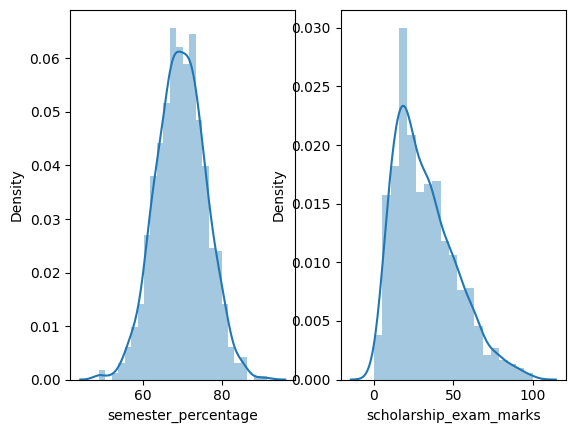

In [5]:
plt.subplot(1,2,1)
sns.distplot(data["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(data["scholarship_exam_marks"])
plt.show()

In [11]:
print("Mean = ", data["semester_percentage"].mean())
print("Std = " ,data["semester_percentage"].std())
print("Max = " ,data["semester_percentage"].max())
print("Min = " ,data["semester_percentage"].min())

Mean =  69.6124
Std =  6.158978751323897
Max =  91.2
Min =  48.9


In [12]:
#Finding the boundary values
print("Highest allowed = ", data["semester_percentage"].mean()+ 3* data["semester_percentage"].std() )
print("Lowest allowed = ", data["semester_percentage"].mean()- 3* data["semester_percentage"].std() )

Highest allowed =  88.08933625397168
Lowest allowed =  51.13546374602831


In [19]:
# finding the outliers
data[(data["semester_percentage"]<51.13) | (data["semester_percentage"]>88.08) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [20]:
#Trimming
data[(data["semester_percentage"]>51.13) & (data["semester_percentage"]<88.08) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [23]:
# another method to trim
data["z_score"] = (data["semester_percentage"]-data["semester_percentage"].mean())/data["semester_percentage"].std()

In [26]:
data[data["z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [27]:
data[data["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [30]:
data[(data["z_score"]>-3) & (data["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


In [32]:
#capping
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()

In [37]:
data["semester_percentage"] =np.where(data["semester_percentage"]>upper_limit,
         upper_limit,
         np.where(data["semester_percentage"]<lower_limit, lower_limit, data["semester_percentage"] ))

In [38]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
data = pd.read_csv("scholarship.csv")

In [43]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\GFG19189\AppData\Local\Temp\ipykernel_5468\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<AxesSubplot: xlabel='scholarship_exam_marks', ylabel='Density'>

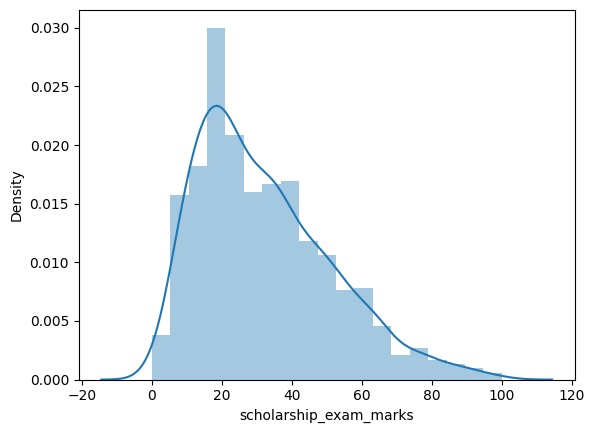

In [44]:
sns.distplot(data["scholarship_exam_marks"])

In [45]:
data["scholarship_exam_marks"].skew()

0.8356419499466834

In [46]:
data["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<AxesSubplot: >

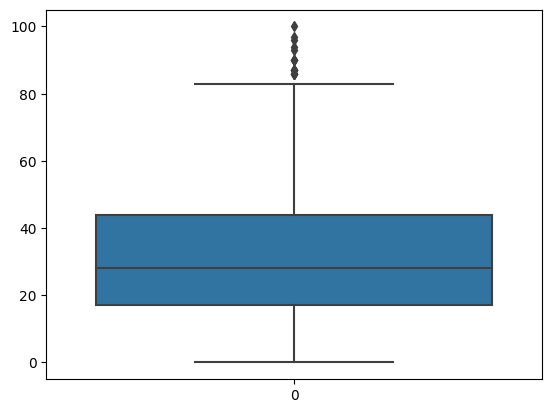

In [47]:
sns.boxplot(data["scholarship_exam_marks"])

In [48]:
percentile25 = data["scholarship_exam_marks"].quantile(0.25)
percentile75 = data["scholarship_exam_marks"].quantile(0.75)

In [49]:
IQR = percentile75 - percentile25

In [50]:
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR

In [51]:
#trimming
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_5468\2007280676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\GFG19189\AppData\Local\Temp\ipykernel_5468\2007280676.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"]

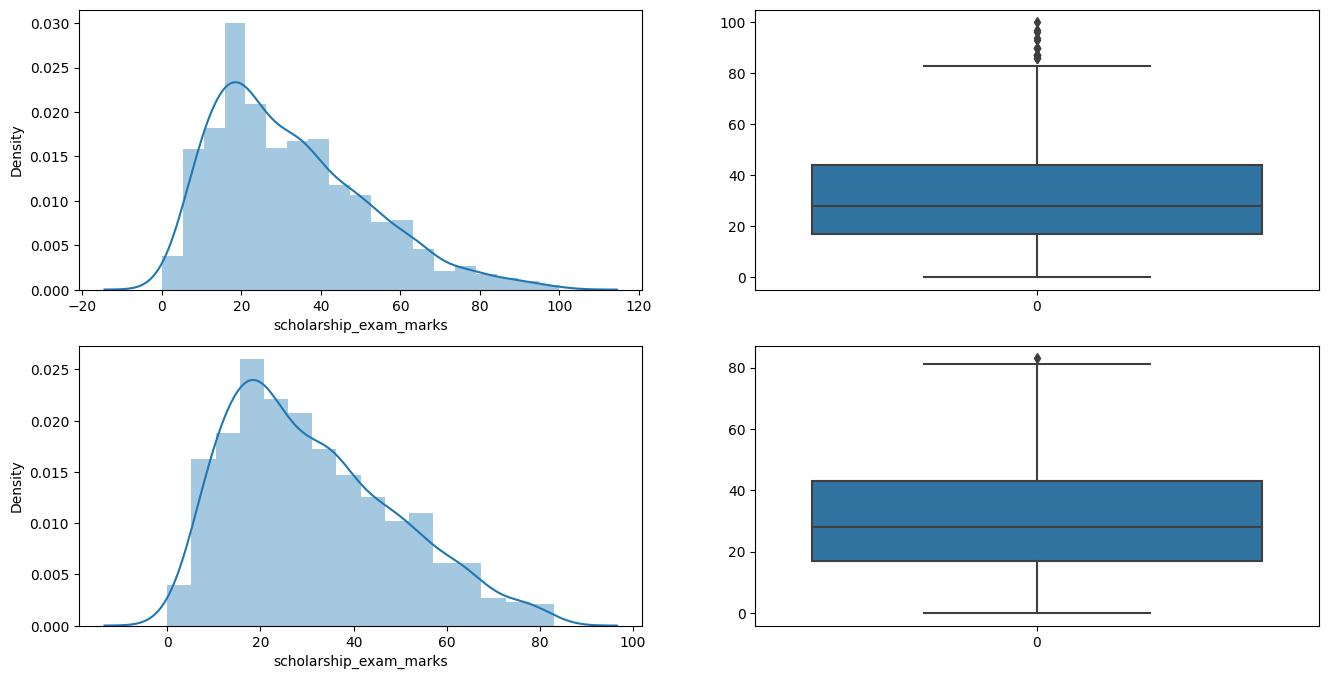

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(df_new["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(df_new["scholarship_exam_marks"])

plt.show()

In [53]:
#capping
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max, 
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))

In [54]:
new_data2.shape

(1000, 3)

In [55]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv("weight-height.csv")

In [20]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
df.shape

(10000, 3)

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_3960\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<AxesSubplot: xlabel='Height', ylabel='Density'>

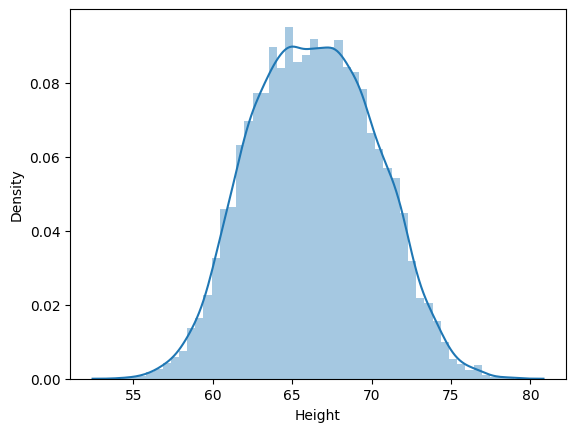

In [24]:
sns.distplot(df["Height"])

<AxesSubplot: >

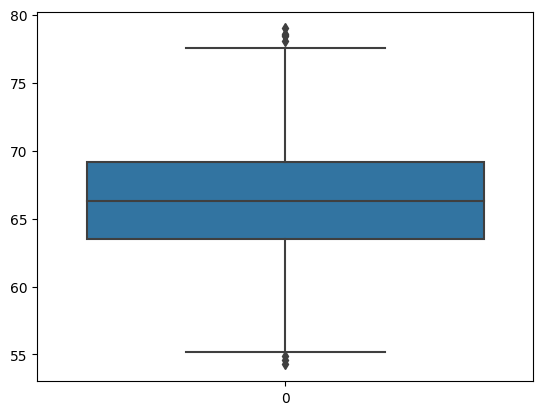

In [26]:
sns.boxplot(df["Height"])

In [30]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [27]:
max_limit = df["Height"].quantile(0.99)
min_limit = df["Height"].quantile(0.01)

In [29]:
max_limit

74.7857900583366

In [37]:
# Trimming
new_data = df[(df["Height"]>min_limit) & (df["Height"]<max_limit)]

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_3960\4021081980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Height"])


<AxesSubplot: xlabel='Height', ylabel='Density'>

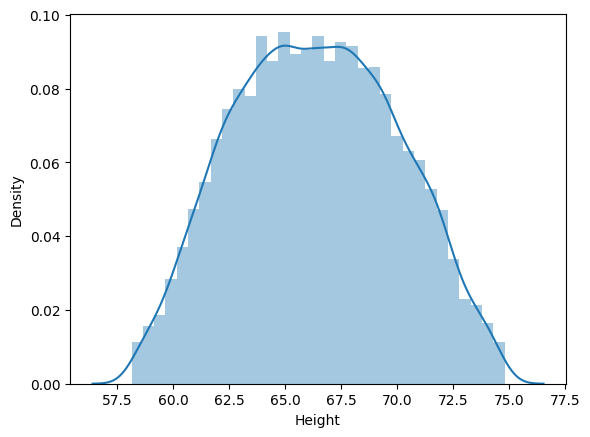

In [35]:
sns.distplot(new_data["Height"])

<AxesSubplot: >

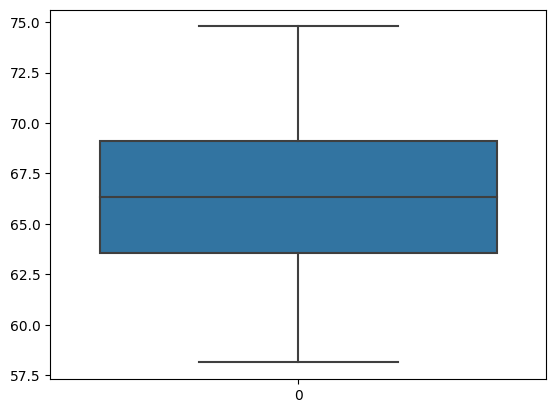

In [36]:
sns.boxplot(new_data["Height"])

In [43]:
#capping
new_data2 = df.copy()
new_data2["Height"] = np.where(df["Height"]>max_limit,max_limit, np.where(df["Height"]<min_limit,min_limit, df["Height"]))

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_3960\1197117282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data2["Height"])


<AxesSubplot: xlabel='Height', ylabel='Density'>

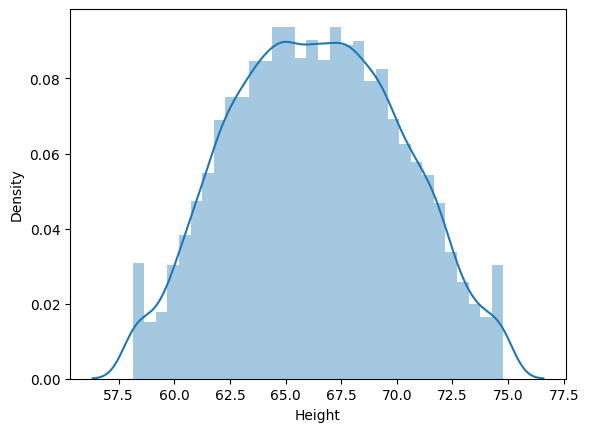

In [45]:
sns.distplot(new_data2["Height"])

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [9]:
df["id"] = df["id"].astype(str)

In [18]:
df["id"].dtype

dtype('O')

In [19]:
df["host_id"] = df["host_id"].astype(str)

In [20]:
df["last_review"] = pd.to_datetime(df["last_review"])

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_3288\3465608367.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["last_review"] = pd.to_datetime(df["last_review"])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48906 non-null  object        
 1   name                            48890 non-null  object        
 2   host_id                         48906 non-null  object        
 3   host_name                       48885 non-null  object        
 4   neighbourhood_group             48906 non-null  object        
 5   neighbourhood                   48906 non-null  object        
 6   latitude                        48906 non-null  float64       
 7   longitude                       48906 non-null  float64       
 8   room_type                       48906 non-null  object        
 9   price                           48906 non-null  int64         
 10  minimum_nights                  48906 non-null  int64         
 11  nu

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

How does the data look mathematically?

In [5]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48906.000000,48906.000000,48906.000000,38854.000000,48906.000000,48906.000000
mean,152.711324,7.031612,23.300454,1.373151,7.142702,112.782031
std,240.128713,20.512489,44.607175,1.680270,32.948926,131.620370
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


range of minimum nights for listings is 1 and 1250

# Categorical Data

In [6]:
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df["room_type"].value_counts()

Entire home/apt    25414
Private room       22332
Shared room         1160
Name: room_type, dtype: int64

In [9]:
df["room_type"].value_counts(normalize = True)

Entire home/apt    0.519650
Private room       0.456631
Shared room        0.023719
Name: room_type, dtype: float64

In [10]:
df["neighbourhood_group"].value_counts()

Manhattan        21669
Brooklyn         20107
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Numerical Data

In [11]:
df["price"].value_counts(bins = 5)

(-10.001, 2000.0]    48820
(2000.0, 4000.0]        54
(4000.0, 6000.0]        16
(6000.0, 8000.0]         9
(8000.0, 10000.0]        7
Name: price, dtype: int64

In [12]:
bins = [-10,0, 50,100, 200,500,800,2000,4000,10000]
df["price"].value_counts(bins = bins)

(50.0, 100.0]        17373
(100.0, 200.0]       16588
(200.0, 500.0]        7340
(0.0, 50.0]           6550
(500.0, 800.0]         624
(800.0, 2000.0]        334
(2000.0, 4000.0]        54
(4000.0, 10000.0]       32
(-10.001, 0.0]          11
Name: price, dtype: int64

It is mainly helpful in small datasets.

## Measures of central tendency

In [13]:
df["price"].mean()

152.71132376395533

In [14]:
df["price"].median()

106.0

In [15]:
df["price"].std()

240.1287131622509

In [16]:
df["minimum_nights"].mean()

7.031611663190611

In [17]:
df["minimum_nights"].median()

3.0

## Measure of Spread

In [18]:
df["price"].skew()

19.120831694826197

In [19]:
df["price"].kurt()

585.7930484394186

How many listings have availability throughout the year (365 days)

In [20]:
df[df["availability_365"]==365].shape[0]

1295

In [21]:
df.corr()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_1056\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042771,-0.048014,-0.030608,0.057478,0.081817
minimum_nights,0.042771,1.000000,-0.080093,-0.121772,0.127917,0.144146
number_of_reviews,-0.048014,-0.080093,1.000000,0.549291,-0.072375,0.172002
reviews_per_month,-0.030608,-0.121772,0.549291,1.000000,-0.009414,0.185818
calculated_host_listings_count,0.057478,0.127917,-0.072375,-0.009414,1.000000,0.225680
availability_365,0.081817,0.144146,0.172002,0.185818,0.225680,1.000000


In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("AB_NYC_2019.csv")

In [33]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


# Categorical

## Bar Graph 

<AxesSubplot: xlabel='room_type', ylabel='count'>

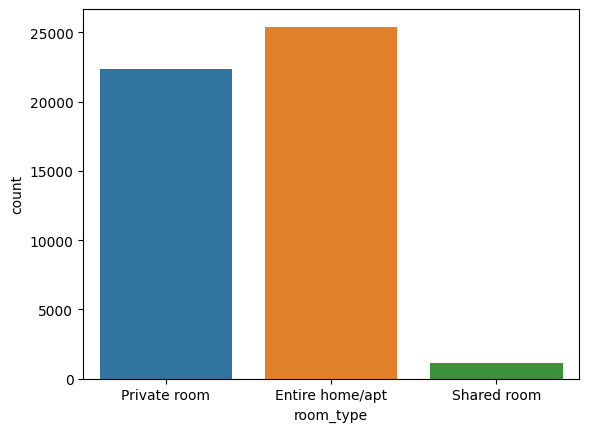

In [34]:
sns.countplot( x=df["room_type"])

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

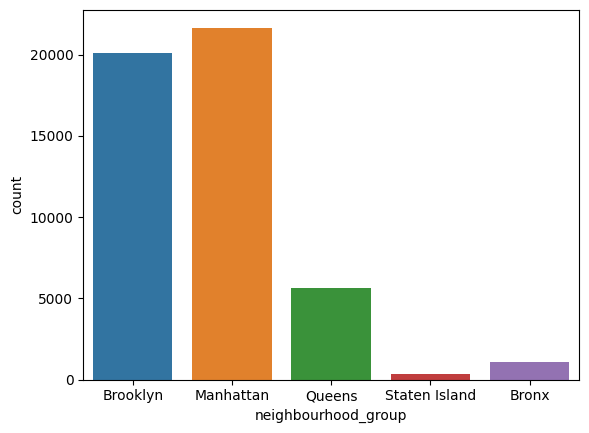

In [35]:
sns.countplot(data=df, x= "neighbourhood_group")

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

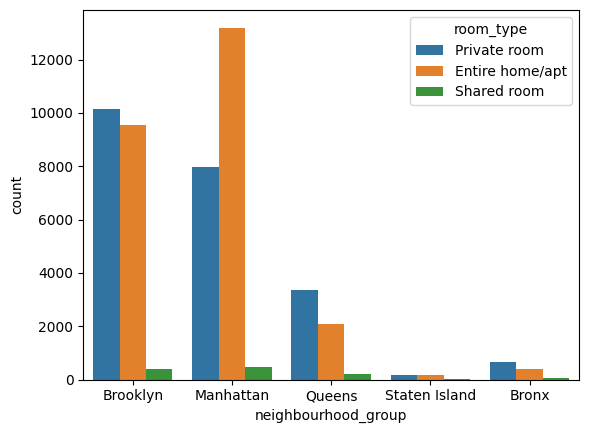

In [36]:
sns.countplot(data = df, x ="neighbourhood_group" , hue = "room_type")

## Pie Chart

<AxesSubplot: ylabel='room_type'>

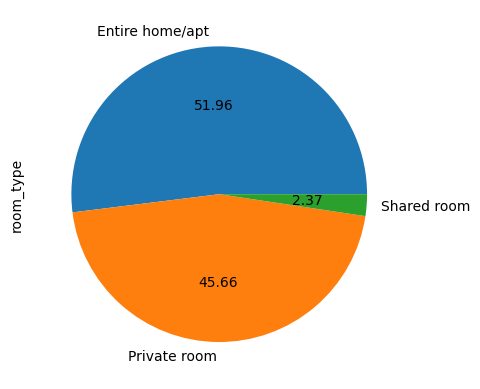

In [37]:
df["room_type"].value_counts().plot(kind = "pie", autopct = "%.2f")

<AxesSubplot: >

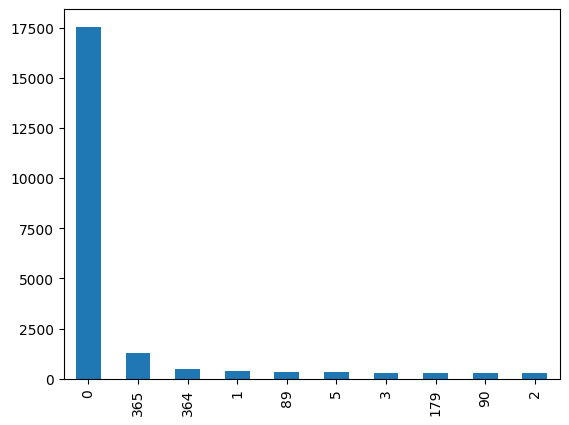

In [38]:
df["availability_365"].value_counts().head(10).plot(kind ="bar")

In [40]:
df2 = sns.load_dataset("titanic")

In [56]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='survived', ylabel='count'>

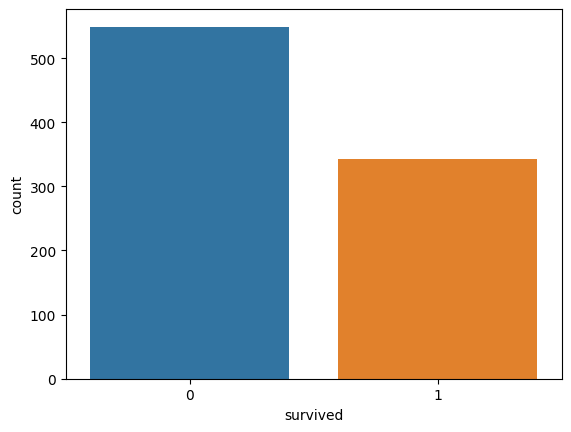

In [49]:
sns.countplot(x = df2["survived"])

<AxesSubplot: xlabel='embark_town', ylabel='count'>

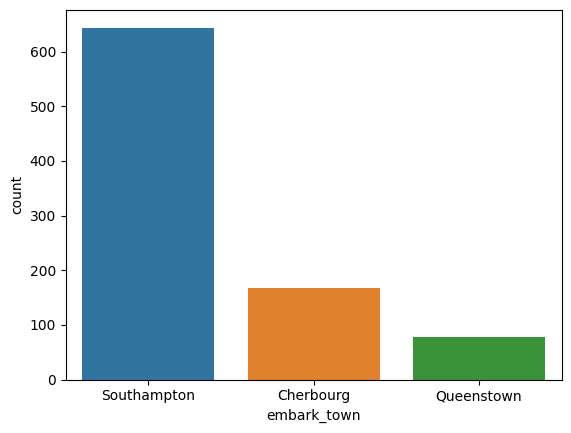

In [51]:
sns.countplot(x = df2["embark_town"])

<AxesSubplot: ylabel='class'>

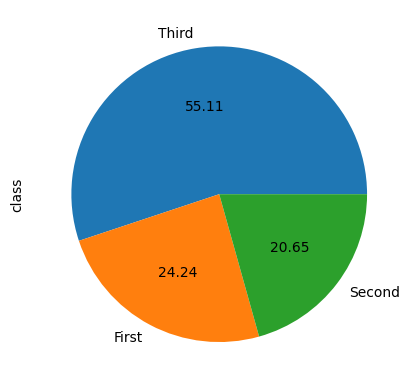

In [54]:
df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f")

<AxesSubplot: xlabel='alone', ylabel='count'>

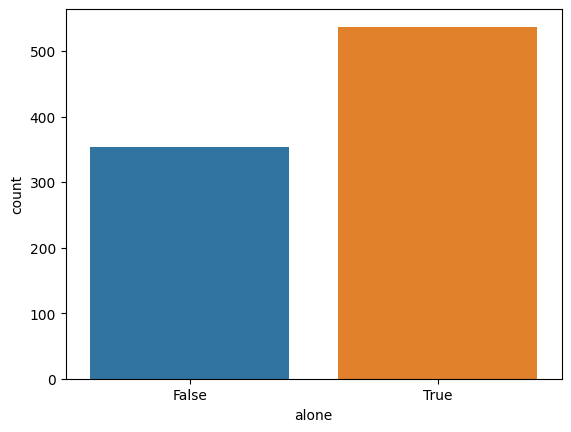

In [57]:
sns.countplot(x = df2["alone"])

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


## Histogram

<AxesSubplot: xlabel='price', ylabel='Count'>

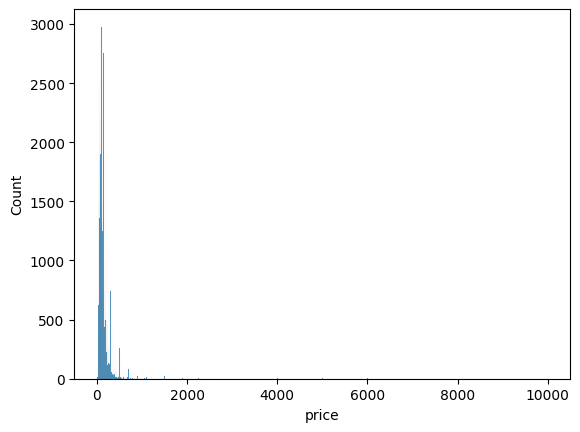

In [4]:
sns.histplot(df["price"])

<AxesSubplot: xlabel='price', ylabel='Count'>

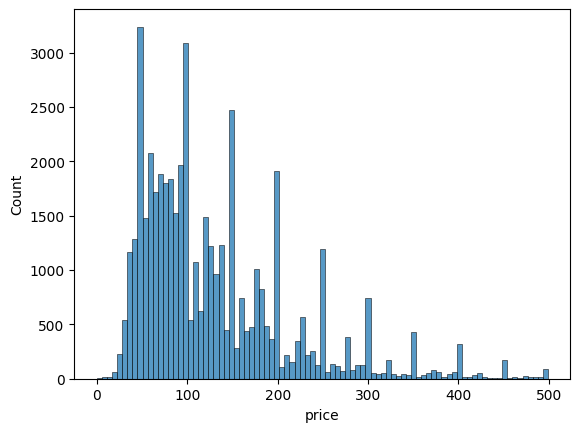

In [10]:
sns.histplot(df[df["price"]<500]["price"])

<AxesSubplot: xlabel='number_of_reviews', ylabel='Count'>

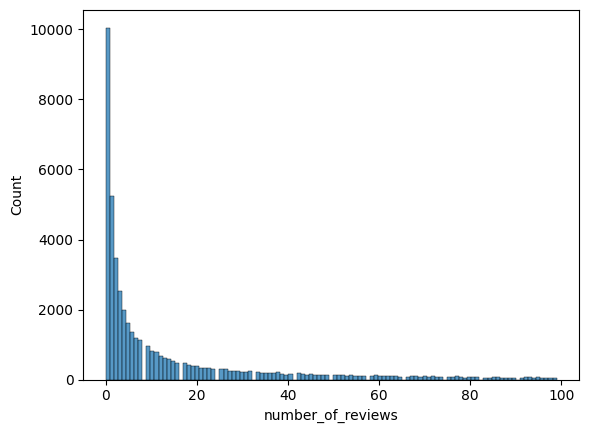

In [14]:
sns.histplot(df[df["number_of_reviews"]<100]["number_of_reviews"])

## Distplot

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_3300\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<AxesSubplot: xlabel='price', ylabel='Density'>

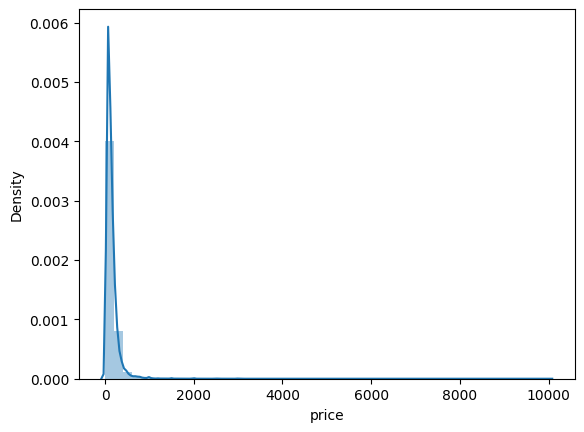

In [16]:
sns.distplot(df["price"])

In [10]:
df["price"].value_counts(bins = 20)

(-10.001, 500.0]     47862
(500.0, 1000.0]        805
(1000.0, 1500.0]       100
(1500.0, 2000.0]        53
(2500.0, 3000.0]        21
(2000.0, 2500.0]        20
(3500.0, 4000.0]        11
(4500.0, 5000.0]         6
(9500.0, 10000.0]        6
(4000.0, 4500.0]         6
(6000.0, 6500.0]         4
(3000.0, 3500.0]         2
(5500.0, 6000.0]         2
(7000.0, 7500.0]         2
(7500.0, 8000.0]         2
(5000.0, 5500.0]         2
(6500.0, 7000.0]         1
(8000.0, 8500.0]         1
(8500.0, 9000.0]         0
(9000.0, 9500.0]         0
Name: price, dtype: int64

<AxesSubplot: >

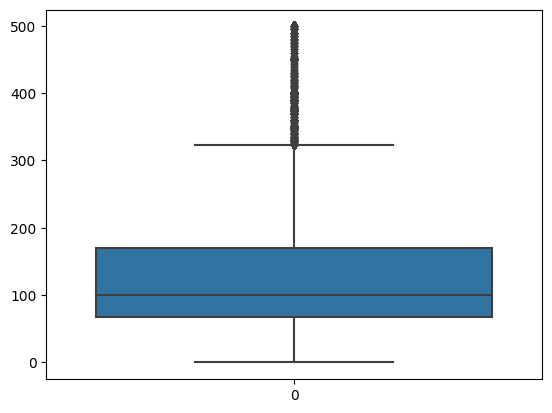

In [6]:
sns.boxplot(df[df["price"]<500]["price"])

<AxesSubplot: >

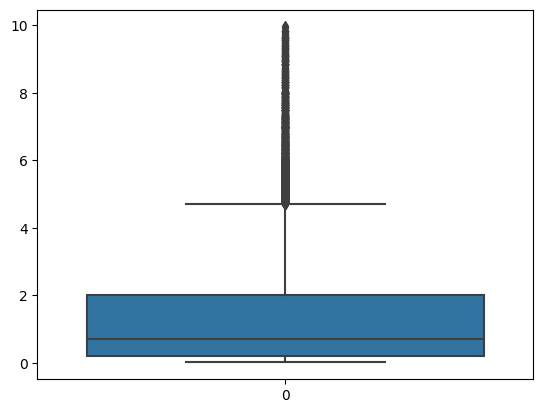

In [7]:
sns.boxplot(df[df["reviews_per_month"]<10]["reviews_per_month"])

In [10]:
df2 = sns.load_dataset("titanic")

In [15]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df2[df2["fare"]==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


C:\Users\GFG19189\AppData\Local\Temp\ipykernel_12796\49255041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

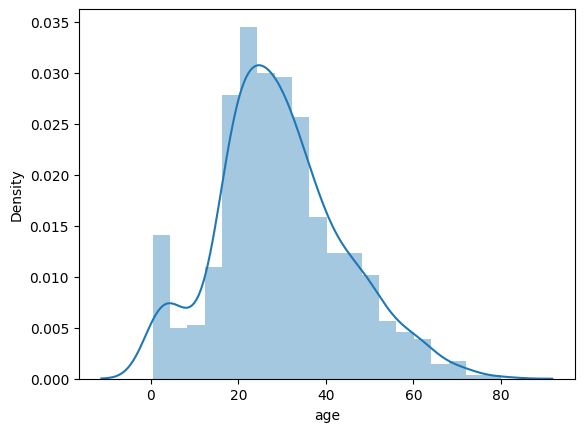

In [13]:
sns.distplot(df2["age"])

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_12796\3524834500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["fare"])


<AxesSubplot: xlabel='fare', ylabel='Density'>

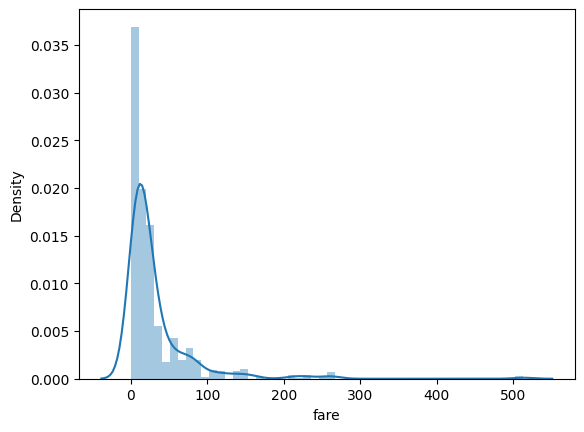

In [25]:
sns.distplot(df2["fare"])

<AxesSubplot: >

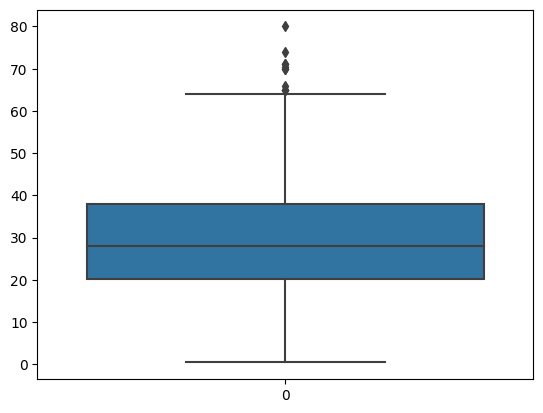

In [26]:
sns.boxplot(df2["age"])

<AxesSubplot: >

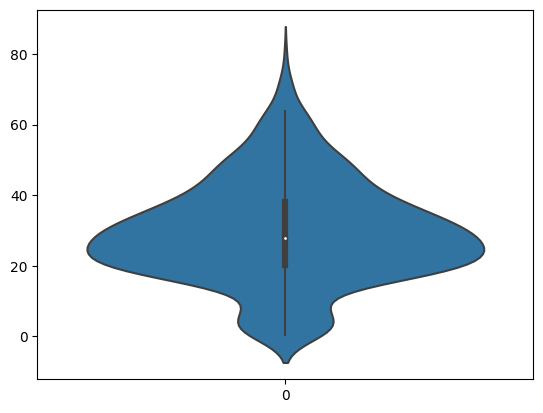

In [28]:
sns.violinplot(df2["age"])

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='age', ylabel='fare'>

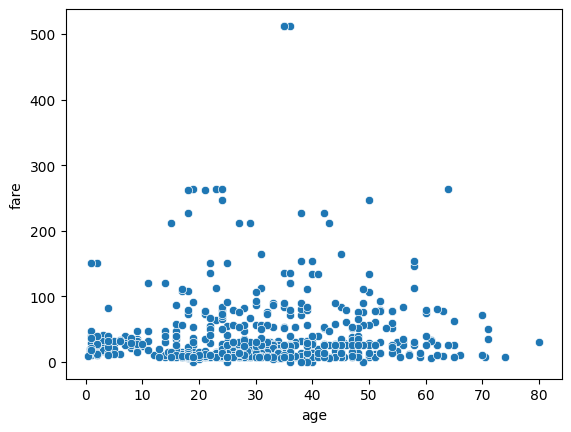

In [4]:
sns.scatterplot(x="age", y = "fare", data = df)

In [5]:
df2 = sns.load_dataset("tips")
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

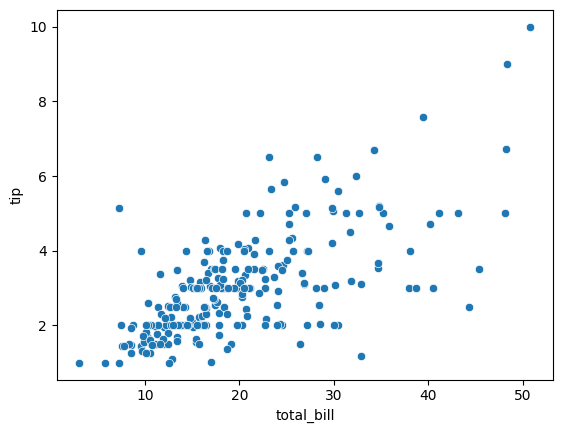

In [6]:
sns.scatterplot(x= "total_bill", y= "tip", data = df2)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

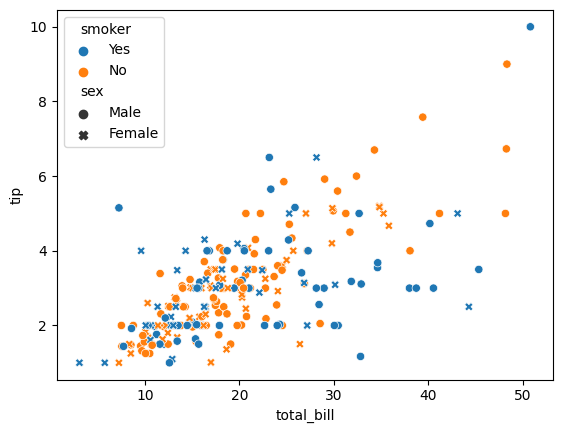

In [7]:
sns.scatterplot(x= "total_bill", y= "tip", hue = "smoker",style = "sex", data = df2)

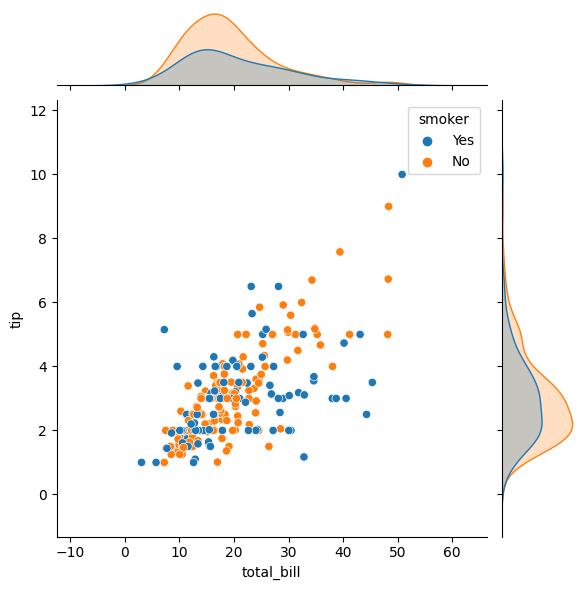

In [19]:
sns.jointplot(x= "total_bill", y= "tip",hue = "smoker" ,data = df2)

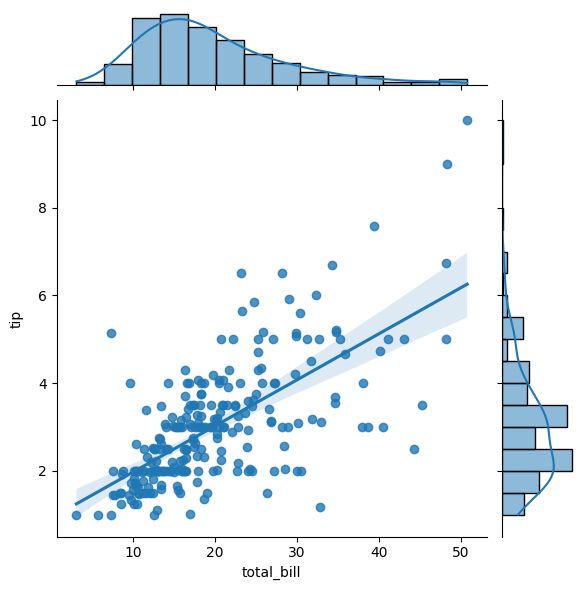

In [9]:
sns.jointplot(x= "total_bill", y= "tip",data = df2, kind ="reg")

In [10]:
df2.corr()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_10920\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
df = sns.load_dataset("dowjones")
df.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


<AxesSubplot: xlabel='Date', ylabel='Price'>

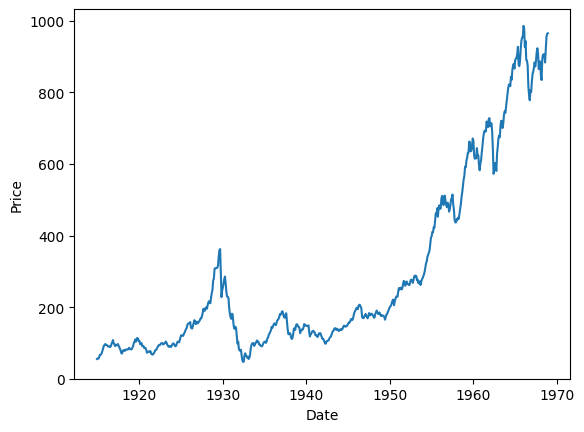

In [13]:
sns.lineplot(x = "Date", y= "Price", data = df)

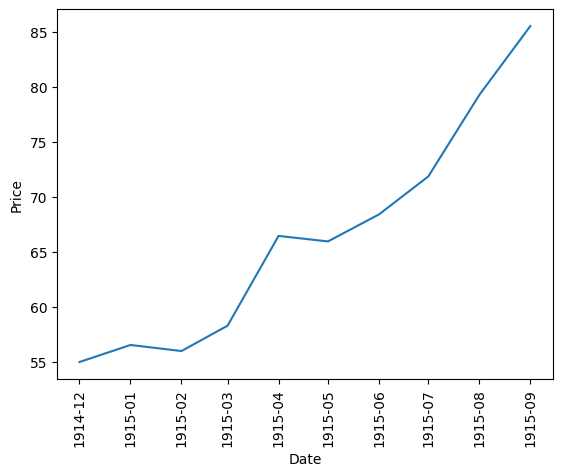

In [14]:
sns.lineplot(x = "Date", y= "Price", data = df.head(10))
plt.xticks(rotation = 90)
plt.show()

In [15]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [16]:
df.head()

,Date,Price,year,month
0,1914-12-01,55.00,1914,12
1,1915-01-01,56.55,1915,1
2,1915-02-01,56.00,1915,2
3,1915-03-01,58.30,1915,3
4,1915-04-01,66.45,1915,4


<AxesSubplot: xlabel='month', ylabel='Price'>

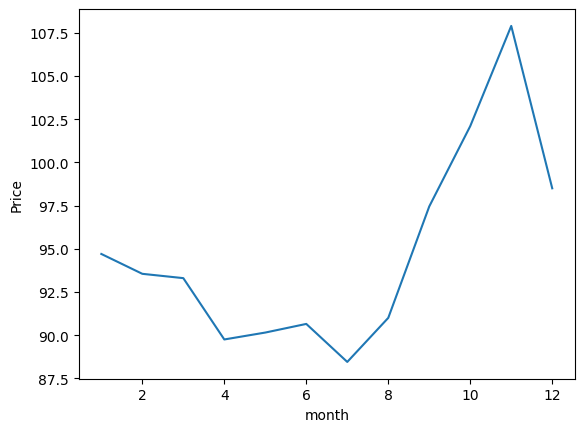

In [17]:
sns.lineplot(x = "month", y= "Price", data = df[df["year"]==1916])

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='class', ylabel='age'>

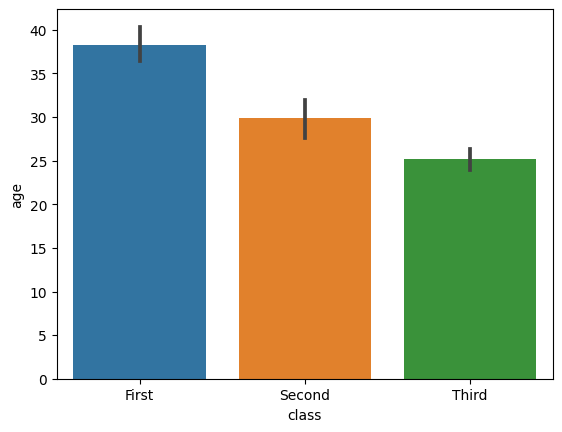

In [4]:
sns.barplot(x ="class", y= "age", data = df)

<AxesSubplot: xlabel='class', ylabel='age'>

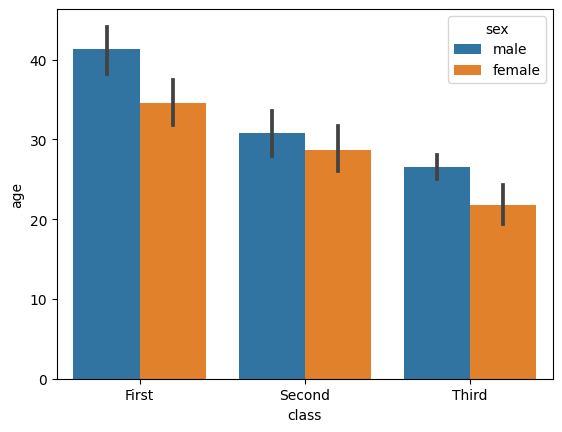

In [14]:
sns.barplot(x ="class", y= "age",hue = "sex", data = df)

<AxesSubplot: xlabel='class', ylabel='age'>

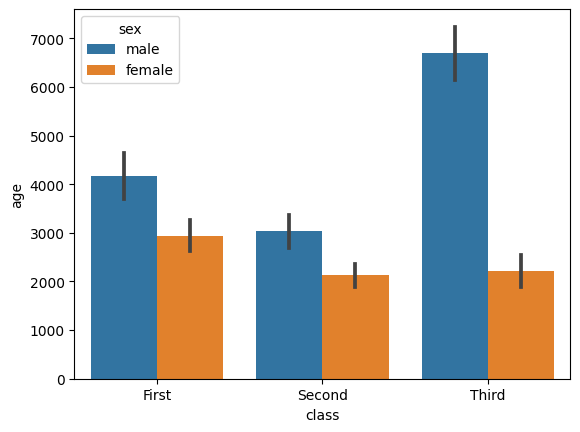

In [16]:
sns.barplot(x ="class", y= "age",hue = "sex",estimator="sum", data = df)

<AxesSubplot: xlabel='sex', ylabel='age'>

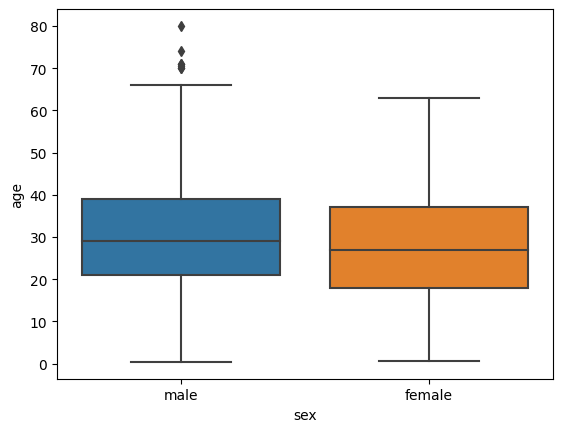

In [17]:
sns.boxplot(x = "sex", y= "age", data = df)

<AxesSubplot: xlabel='sex', ylabel='age'>

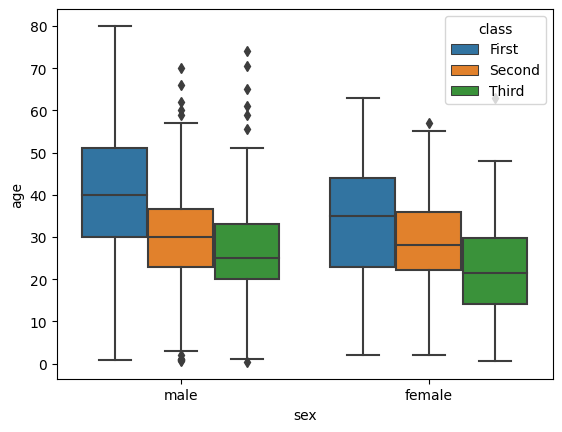

In [18]:
sns.boxplot(x = "sex", y= "age", hue = "class", data = df)

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_15108\35758194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["survived"]==0]["age"], hist = False)
C:\Users\GFG19189\AppData\Local\Temp\ipykernel_15108\35758194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[

<AxesSubplot: xlabel='age', ylabel='Density'>

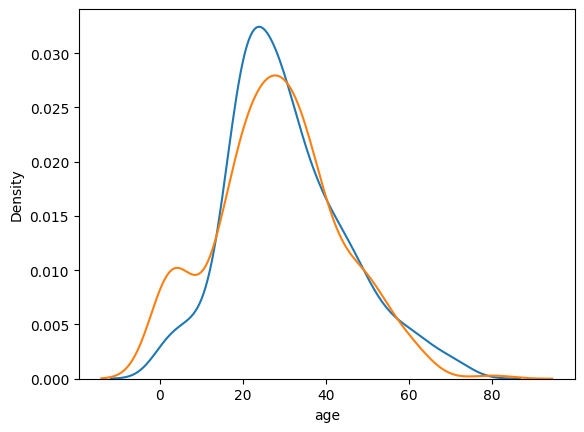

In [23]:
sns.distplot(df[df["survived"]==0]["age"], hist = False)
sns.distplot(df[df["survived"]==1]["age"], hist = False)

<AxesSubplot: xlabel='sex', ylabel='fare'>

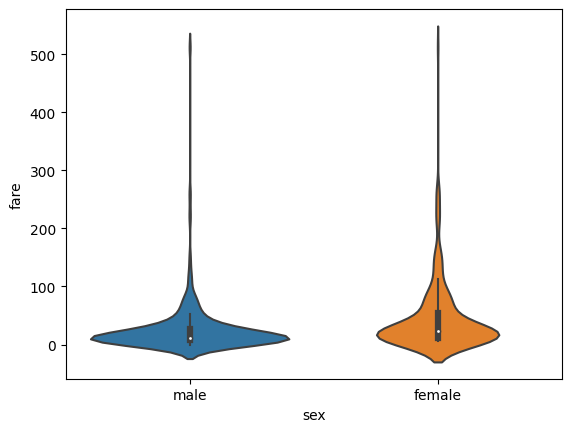

In [29]:
sns.violinplot(x = "sex", y = "fare", data = df)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='sex', ylabel='age'>

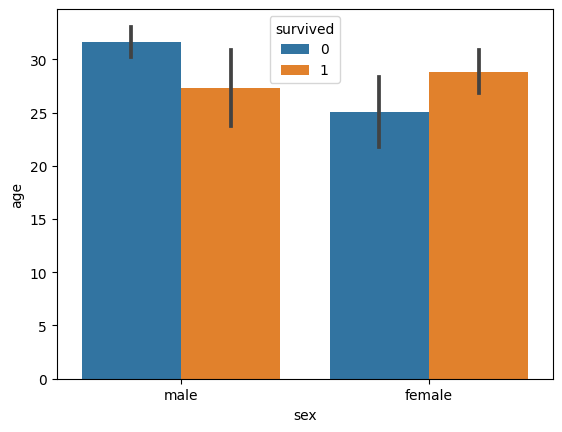

In [3]:
sns.barplot(x = "sex", y= "age",hue = "survived" ,data = df)

<AxesSubplot: xlabel='class', ylabel='age'>

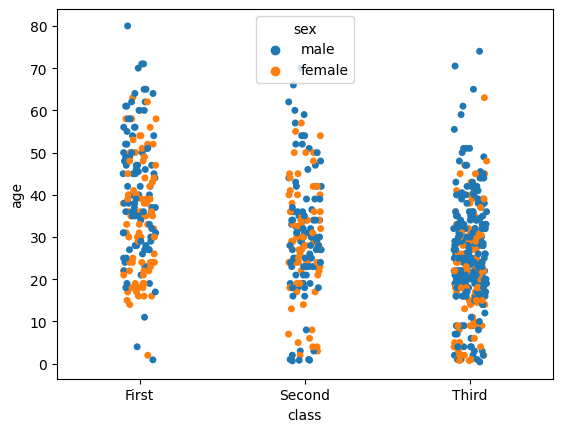

In [4]:
sns.stripplot(x="class", y= "age",hue = "sex", data = df)

In [5]:
x = pd.crosstab(df["class"],df["survived"])

In [11]:
x

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


<AxesSubplot: xlabel='survived', ylabel='class'>

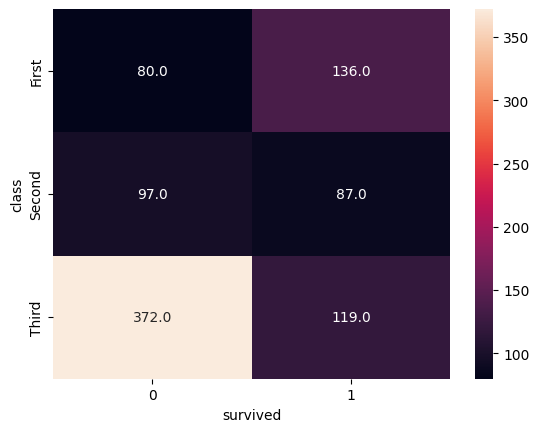

In [31]:
sns.heatmap(x,annot= True, fmt = ".1f")

In [7]:
df2 = sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: >

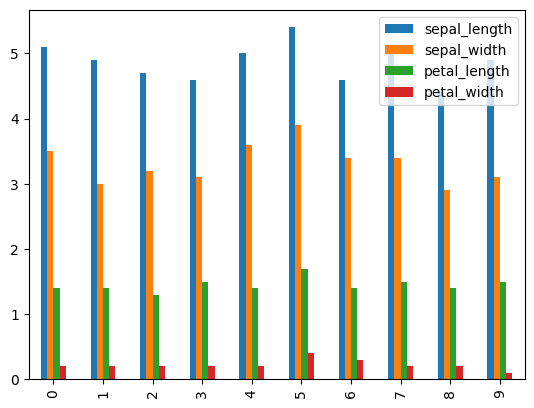

In [8]:
df2.head(10).plot(kind = "bar")

<AxesSubplot: >

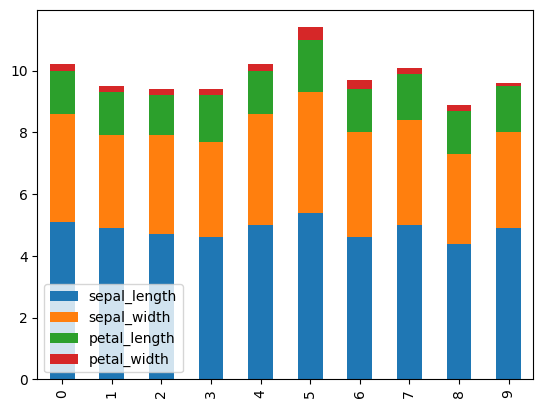

In [9]:
df2.head(10).plot(kind = "bar", stacked = True)

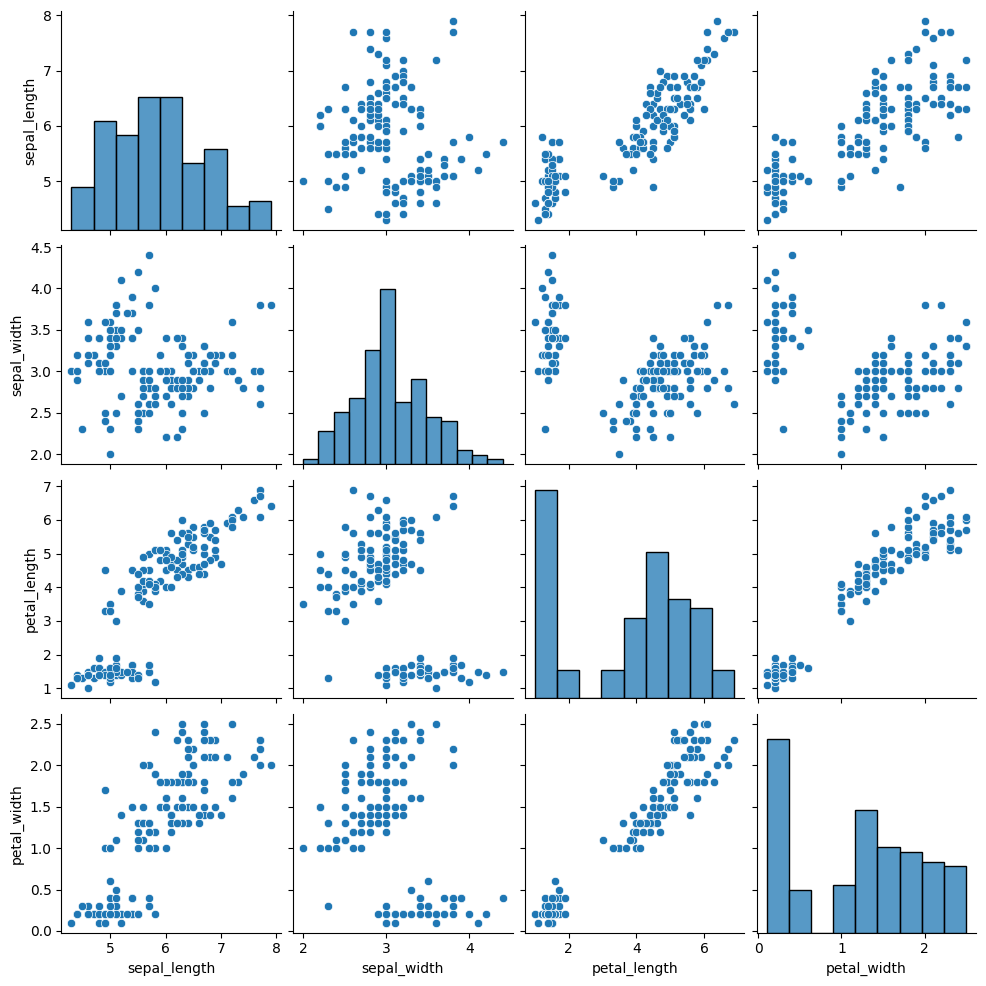

In [10]:
sns.pairplot(df2)